# Particula tour

We have designed `particula` around object-oriented programming principles where physics entities inherit from each other.

1. It all starts with an `Environment` object (class) where temperature, pressure, and other derived properties are defined. For now, the two main derived properties are the dynamic viscosity and mean free path.
2. Then, the `Vapor` object inherits from `Environment` and adds its own properties, mainly vapor properties like radius and density, but also derived properties like the driving force of condensation.
3. The most involved object `Particle` builds on `Vapor` (and thus `Environment`). It is split into steps to isolate different components (e.g. making a distribution, making particle instances, calculating condensation, and calculating coagulation are all split into different objects that build on each other). In `Particle`, the idea is to form a fully equipped particle distribution, whose properties are readily available and calculated.
4. Up to `Particle`, there is no sense of a time dimension. To add one, we create the `Rates` object who takes as input the `Particle` object, thus explicitly allowing dynamics-specific calculations, or "rates".
5. Finally, a dynamic `Solver` object builds on `Rates` and propagates the `Particle` object in time.

In [1]:
from particula.particle import Particle
from particula.rates import Rates
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# define the dist
deets = {
    "mode": [10e-9, 70e-9],
    "gsigma": [1.6, 2.0],
    "nbins": 2000,
    "particle_number": [17/20, 3/20],
}
# get it
part_dist = Particle(**deets)
r = Rates(particle=part_dist, lazy=False)

In [3]:
# utility function to plot
def plot_some(x, y, grid="semilogx", title=None, label=None):
    """ plot y vs x with grid, providing title and label """
    if grid == "loglog":
        plt.loglog(x.m, y.m, label=label)
    else:
        plt.semilogx(x.m, y.m, label=label);
    if label is not None:
        plt.legend()
    plt.title(title)
    plt.xlabel(f"{x.u}"); plt.ylabel(f"{y.u}");

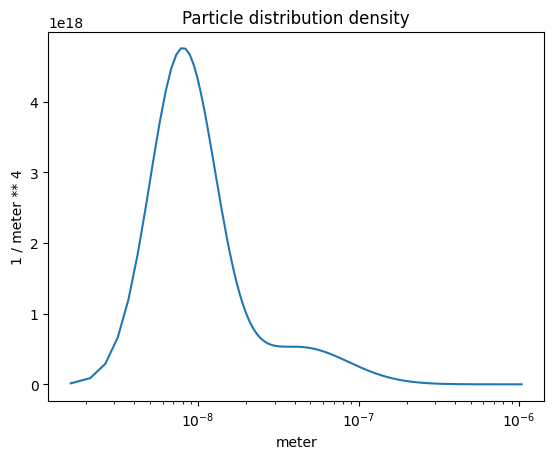

In [4]:
plot_some(
    x=part_dist.particle_radius,
    y=part_dist.particle_distribution(),
    title="Particle distribution density",
)

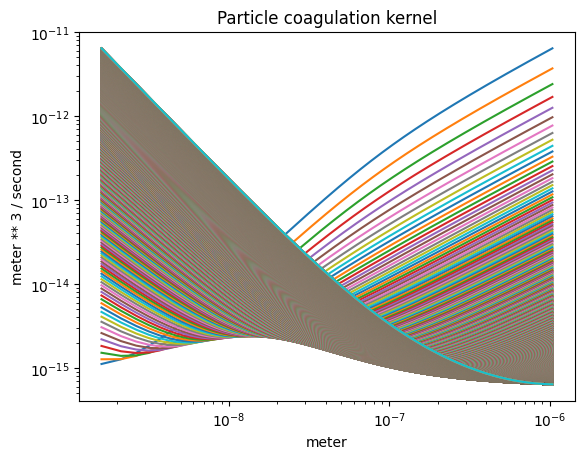

In [5]:
plot_some(
    x=part_dist.particle_radius,
    y=part_dist.coagulation(),
    title="Particle coagulation kernel",
    grid="loglog"
)

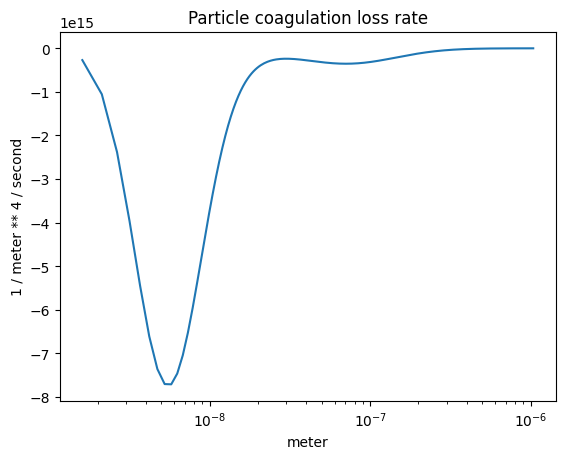

In [6]:
plot_some(
    x=part_dist.particle_radius,
    y=-r.coagulation_loss(),
    title="Particle coagulation loss rate",
)

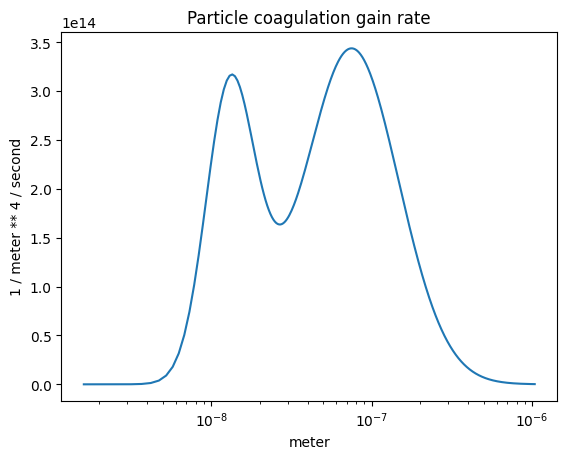

In [7]:
plot_some(
    x=part_dist.particle_radius,
    y=r.coagulation_gain(),
    title="Particle coagulation gain rate",
)

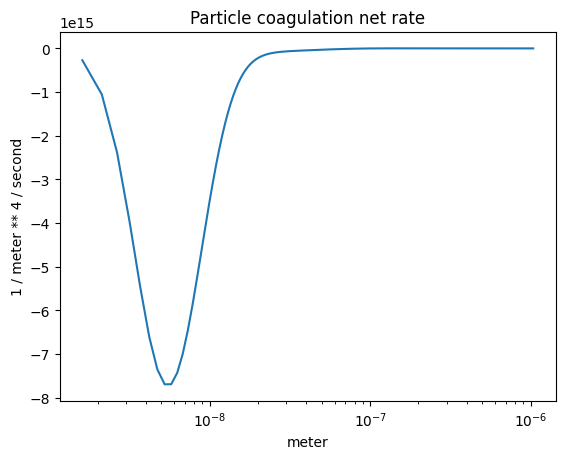

In [8]:
plot_some(
    x=part_dist.particle_radius,
    y=r.coagulation_rate(),
    title="Particle coagulation net rate",
)

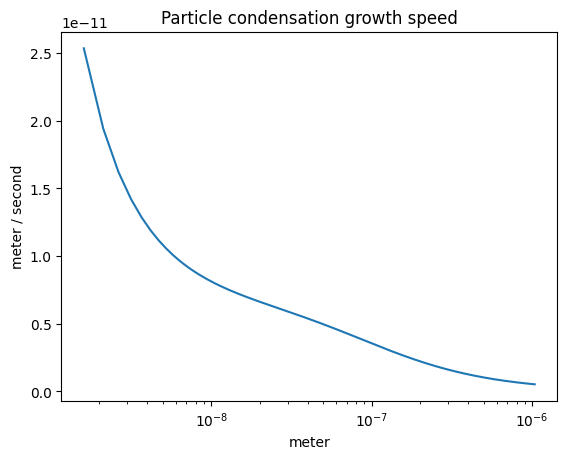

In [9]:
plot_some(
    x=part_dist.particle_radius,
    y=r.condensation_growth_speed(),
    title="Particle condensation growth speed",
)

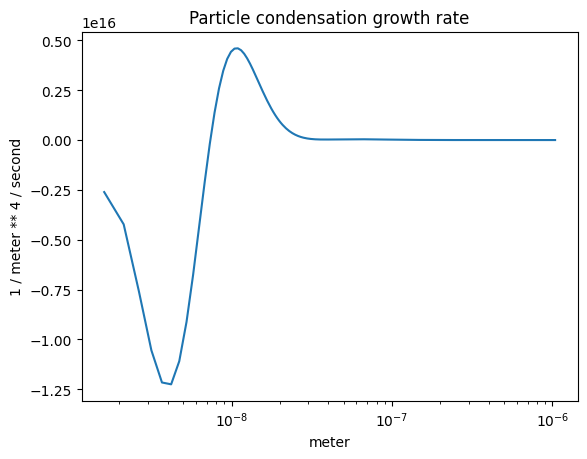

In [10]:
plot_some(
    x=part_dist.particle_radius,
    y=r.condensation_growth_rate(),
    title="Particle condensation growth rate",
)

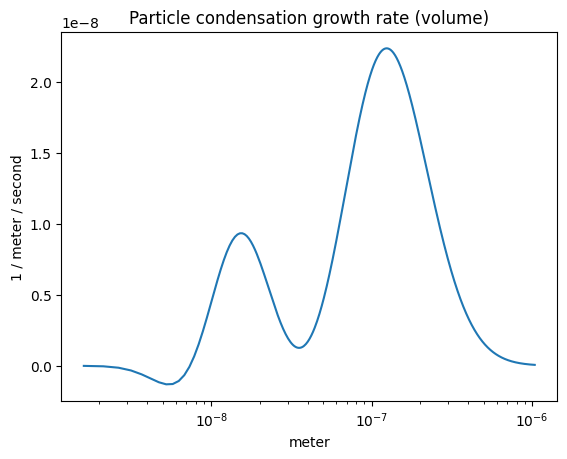

In [11]:
plot_some(
    x=part_dist.particle_radius,
    y=r.condensation_growth_rate()*part_dist.particle_radius**3,
    title="Particle condensation growth rate (volume)",
)

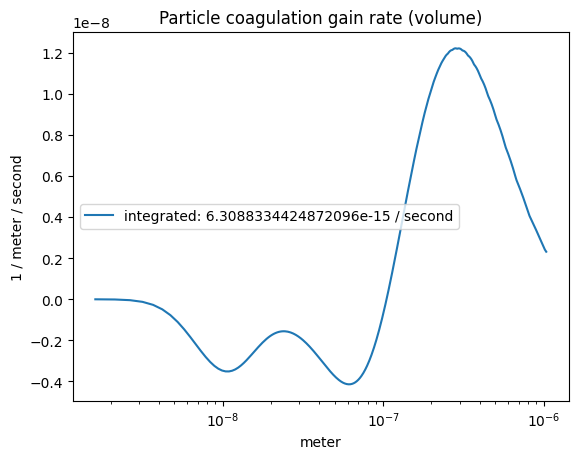

In [12]:
plot_some(
    x=part_dist.particle_radius,
    y=r.coagulation_rate()*part_dist.particle_radius**3,
    title="Particle coagulation gain rate (volume)",
    label=f"integrated: {np.trapz(r.coagulation_rate()*part_dist.particle_radius**3, part_dist.particle_radius)}"
)

In [14]:
from particula.dynamics import Solver
# define the dist
deets = {
    "mode": [10e-9, 70e-9],
    "gsigma": [1.6, 2.0],
    "nbins": 1000,
    "particle_number": [17/20, 3/20],
}
# get it
part_dist = Particle(**deets)
r = Rates(particle=part_dist, lazy=True)
time_span = [0, 60]
s = Solver(particle=part_dist, time_span=time_span)
sols = s.solution()
plt.semilogx(part_dist.particle_radius.m, sols[0].m, label=f"Initial at {time_span[0]} seconds")
plt.semilogx(part_dist.particle_radius.m, sols[-1].m, label=f"Final after {time_span[-1]} seconds")
plt.legend()